# Enhanced Visualization of the BA Network
This visualization highlights the most important nodes in the network (e.g., nodes with the highest degree) 

Generating Barabási-Albert scale-free network...


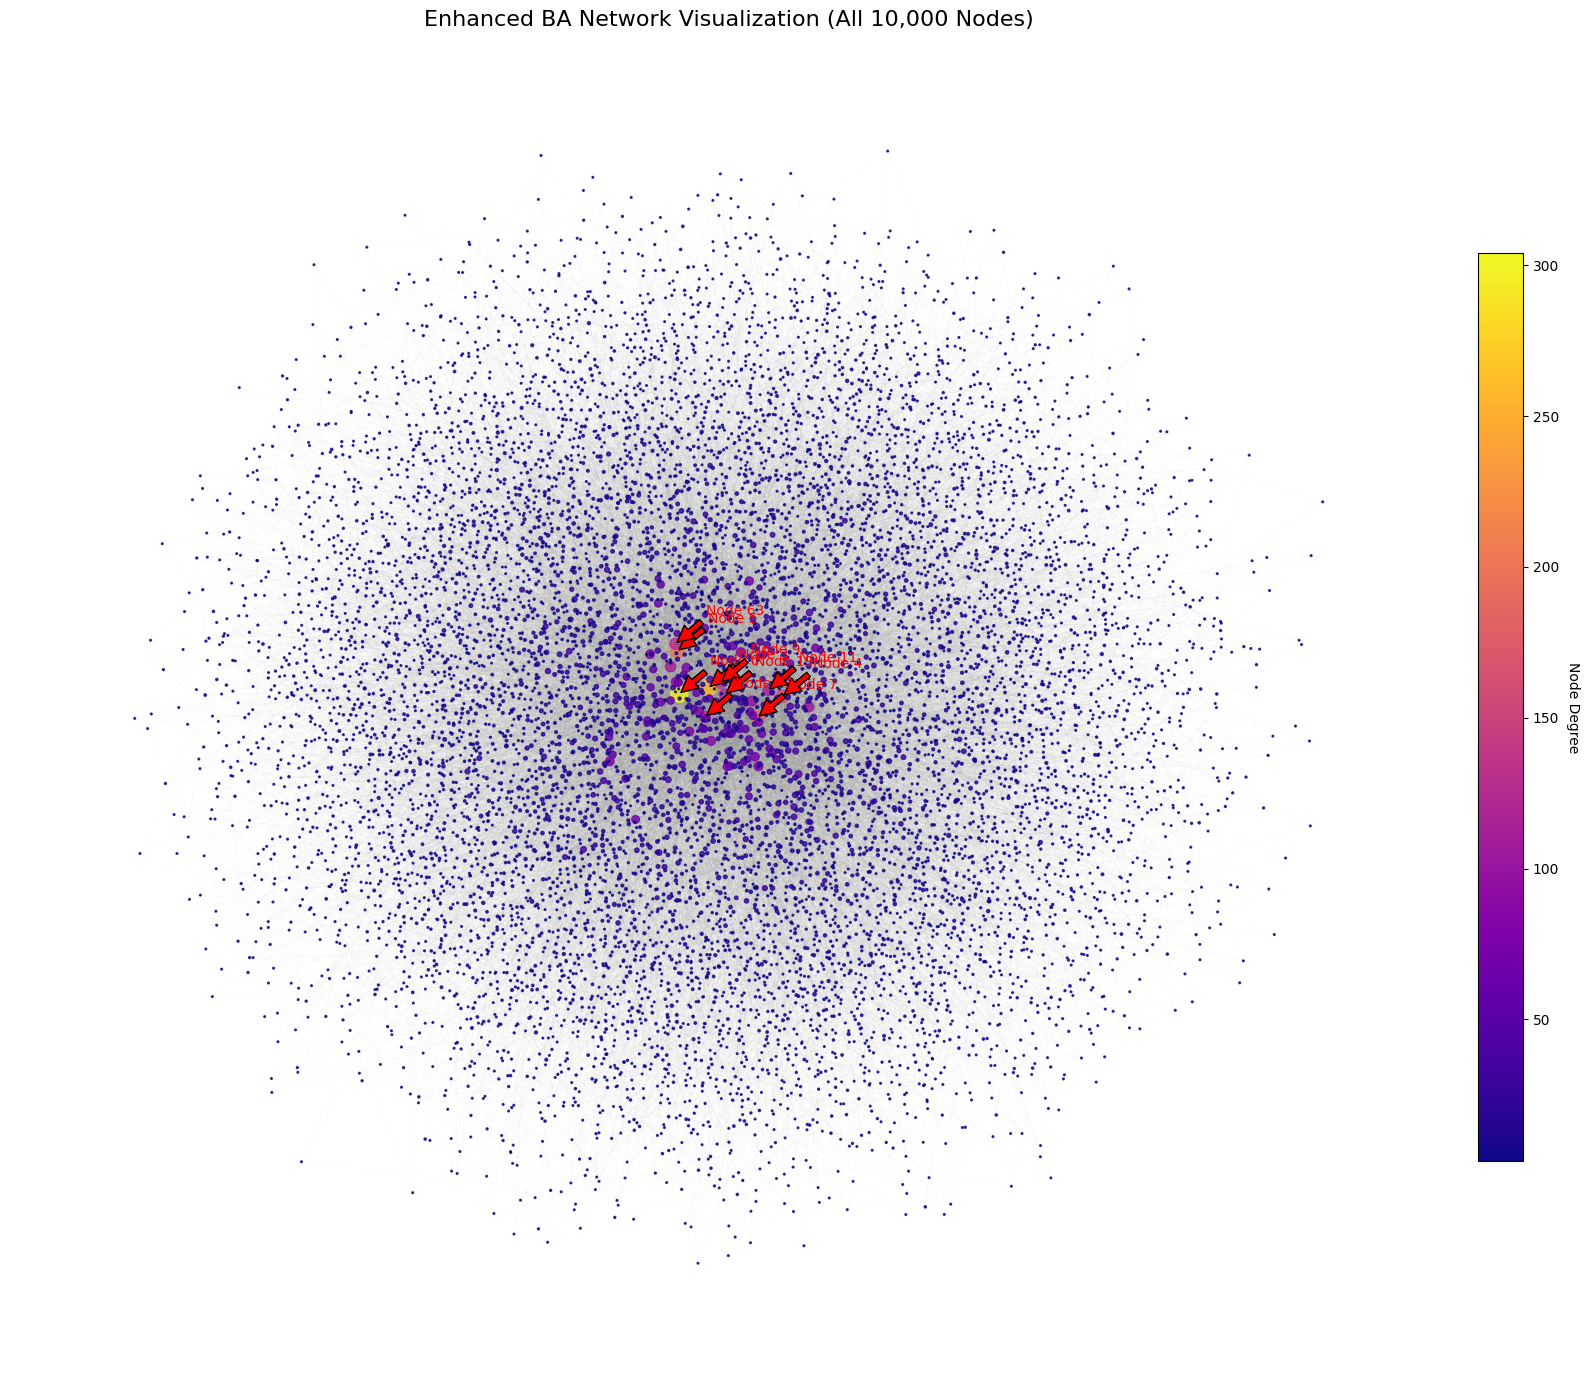

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- SETTINGS ---
TOTAL_NODES = 10000
EDGES_PER_STEP = 3  # Each new node connects to 3 existing nodes

# --- STEP 1: Generate BA Scale-Free Network ---
print("Generating Barabási-Albert scale-free network...")
G = nx.barabasi_albert_graph(n=TOTAL_NODES, m=EDGES_PER_STEP)

# Enhanced Visualization Function
def enhanced_visualize_full_graph(graph, title):
    degrees = dict(graph.degree())
    node_sizes = [degrees[n]*0.5 for n in graph.nodes()]  # Scaled for readability
    node_colors = [degrees[n] for n in graph.nodes()]

    pos = nx.spring_layout(graph, seed=42, k=0.1)  # k controls spacing

    fig, ax = plt.subplots(figsize=(16, 14))
    nx.draw_networkx_edges(graph, pos, ax=ax, alpha=0.05, width=0.3, edge_color='gray')
    nodes = nx.draw_networkx_nodes(
        graph,
        pos,
        ax=ax,
        node_size=node_sizes,
        node_color=node_colors,
        cmap=plt.cm.plasma,
        alpha=0.8
    )

    ax.set_title(title, fontsize=16)
    ax.axis("off")

    sm = plt.cm.ScalarMappable(
        cmap=plt.cm.plasma,
        norm=plt.Normalize(vmin=min(degrees.values()), vmax=max(degrees.values()))
    )
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
    cbar.ax.set_ylabel("Node Degree", rotation=270, labelpad=15)

    # Highlight important nodes
    top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:10]
    for node in top_nodes:
        ax.annotate(
            f'Node {node}',
            xy=pos[node],
            xytext=(pos[node][0]+0.05, pos[node][1]+0.05),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=10, color='red'
        )

    plt.tight_layout()
    plt.show()

enhanced_visualize_full_graph(G, "Enhanced BA Network Visualization (All 10,000 Nodes)")

Finding giant component...
Giant Component Size: 10000 nodes


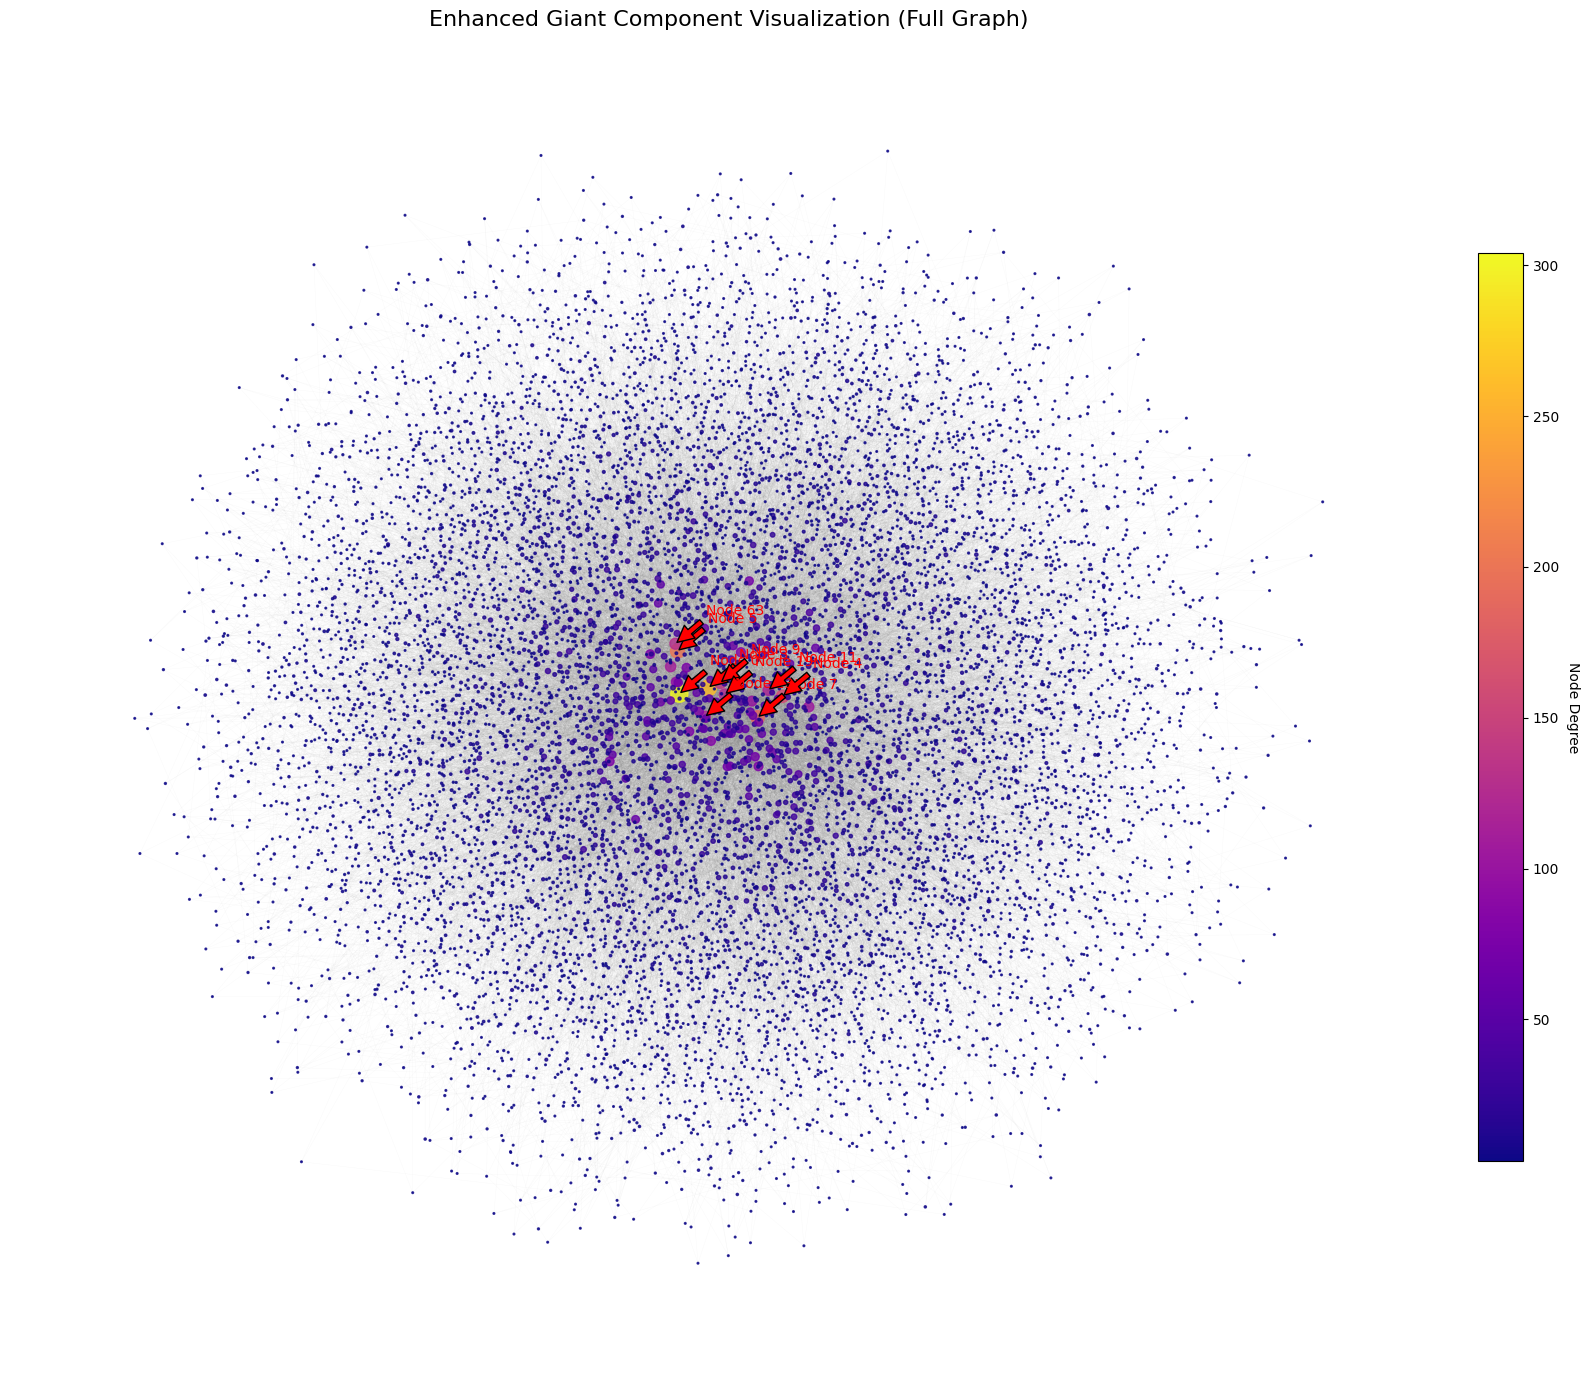

In [2]:

# --- STEP 2: Giant Component Extraction and Visualization ---
print("Finding giant component...")
components = list(nx.connected_components(G))
giant_component_nodes = max(components, key=len)
G_giant = G.subgraph(giant_component_nodes)

print(f"Giant Component Size: {G_giant.number_of_nodes()} nodes")

# Visualize the full giant component with enhanced settings
enhanced_visualize_full_graph(G_giant, "Enhanced Giant Component Visualization (Full Graph)")


In [ ]:

# --- STEP 3: Enhanced Network Statistics ---
import time

def compute_network_stats(graph):
    start_time = time.time()
    print("Calculating network statistics...")
    degrees = dict(graph.degree())
    mean_deg = sum(degrees.values()) / graph.number_of_nodes()
    density = nx.density(graph)
    
    print(f"  Calculating average local clustering... ({time.time() - start_time:.2f}s elapsed)")
    avg_local_clust = nx.average_clustering(graph)
    
    print(f"  Calculating global clustering (transitivity)... ({time.time() - start_time:.2f}s elapsed)")
    global_clust = nx.transitivity(graph)
    
    # Note: Calculating shortest paths and diameter can be computationally expensive for large graphs.
    avg_shortest_path = None
    diameter = None
    # try:
    #     print(f"  Calculating average shortest path length... (This may take a while) ({time.time() - start_time:.2f}s elapsed)")
    #     avg_shortest_path = nx.average_shortest_path_length(graph)
    #     print(f"  Calculating diameter... (This may take a while) ({time.time() - start_time:.2f}s elapsed)")
    #     diameter = nx.diameter(graph)
    # except Exception as e:
    #     print(f"Could not calculate shortest path/diameter: {e}")
        
    print(f"Finished calculations. Total time: {time.time() - start_time:.2f}s")
    return mean_deg, density, avg_local_clust, global_clust, avg_shortest_path, diameter

mean_degree, network_density, avg_clustering, global_clustering, avg_path, diam = compute_network_stats(G_giant)

print("\n--- Giant Component Statistics ---")
print(f"Number of Nodes: {G_giant.number_of_nodes()}")
print(f"Number of Edges: {G_giant.number_of_edges()}")
print(f"Mean Degree: {mean_degree:.4f}")
print(f"Network Density: {network_density:.6f}")
print(f"Average Local Clustering Coefficient: {avg_clustering:.4f}")
print(f"Global Clustering Coefficient (Transitivity): {global_clustering:.4f}")
if avg_path is not None:
    print(f"Average Shortest Path Length: {avg_path:.4f}")
if diam is not None:
    print(f"Diameter: {diam}")



--- Giant Component Statistics ---
Mean Degree: 3.9992
Average Local Clustering Coefficient: 0.0040
Global Clustering Coefficient: 0.0016


Calculating network statistics...
  Calculating average local clustering... (0.11s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
Finished calculations. Total time: 1.44s
Finished calculations. Total time: 1.44s


Calculating network statistics...
  Calculating average local clustering... (0.11s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
Finished calculations. Total time: 1.44s
Finished calculations. Total time: 1.44s


/tmp/ipykernel_3450/376105276.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=stats_df, palette='viridis')


Calculating network statistics...
  Calculating average local clustering... (0.11s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
Finished calculations. Total time: 1.44s
Finished calculations. Total time: 1.44s


/tmp/ipykernel_3450/376105276.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=stats_df, palette='viridis')


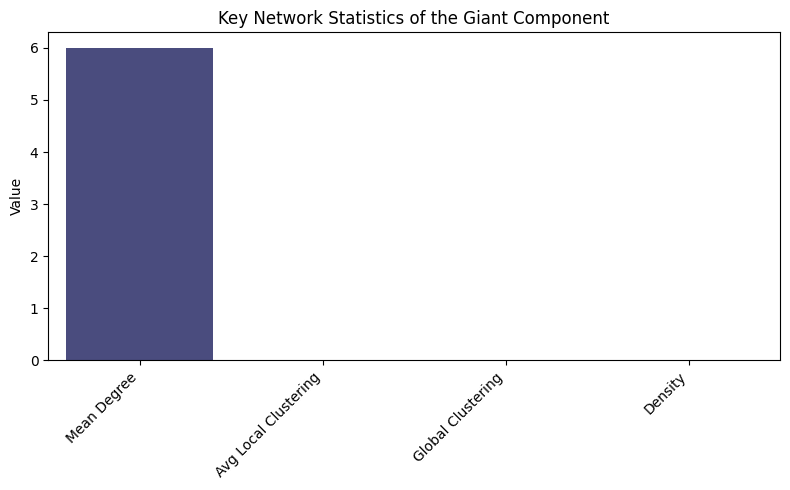

Calculating network statistics...
  Calculating average local clustering... (0.11s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
Finished calculations. Total time: 1.44s
Finished calculations. Total time: 1.44s


/tmp/ipykernel_3450/376105276.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=stats_df, palette='viridis')


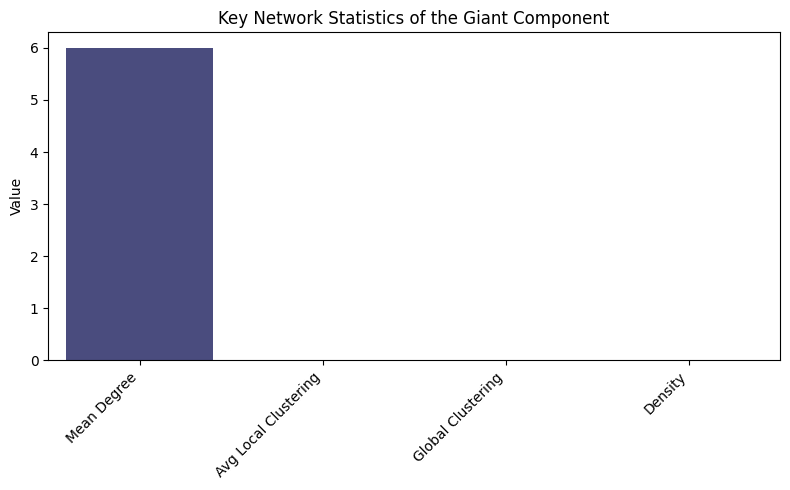

Calculating local clustering coefficients for distribution plot...


Calculating network statistics...
  Calculating average local clustering... (0.11s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
  Calculating global clustering (transitivity)... (0.74s elapsed)
Finished calculations. Total time: 1.44s
Finished calculations. Total time: 1.44s


/tmp/ipykernel_3450/376105276.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=stats_df, palette='viridis')


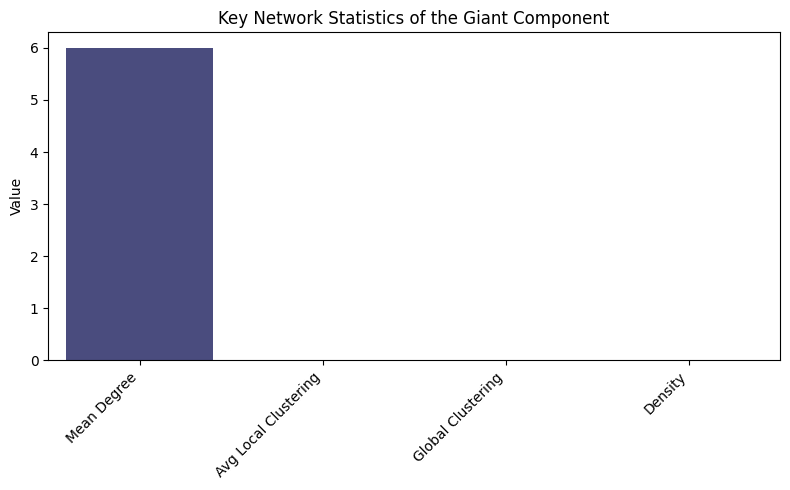

Calculating local clustering coefficients for distribution plot...


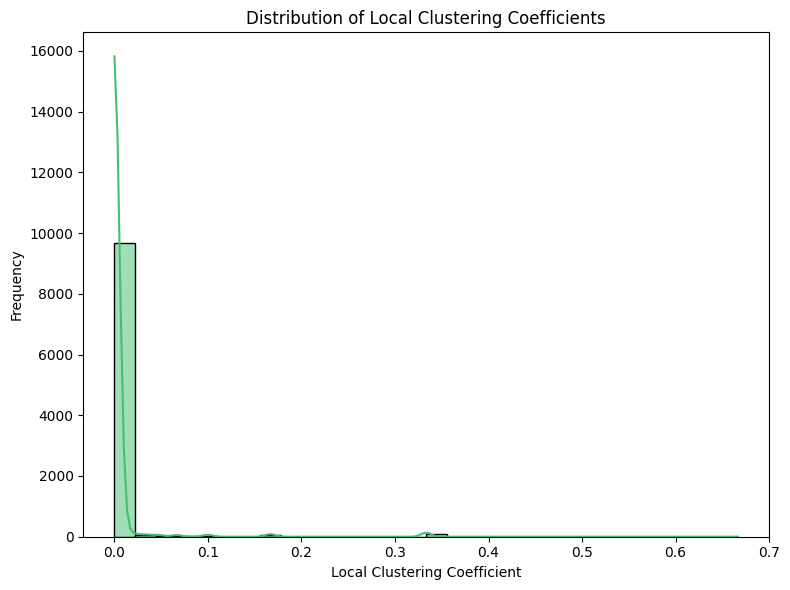

In [6]:
# --- STEP 3b: Visualize Network Statistics ---
import pandas as pd

# Redefine compute_network_stats function
def compute_network_stats(graph):
    import time
    start_time = time.time()
    print("Calculating network statistics...")
    degrees = dict(graph.degree())
    mean_deg = sum(degrees.values()) / graph.number_of_nodes()
    density = nx.density(graph)
    
    print(f"  Calculating average local clustering... ({time.time() - start_time:.2f}s elapsed)")
    avg_local_clust = nx.average_clustering(graph)
    
    print(f"  Calculating global clustering (transitivity)... ({time.time() - start_time:.2f}s elapsed)")
    global_clust = nx.transitivity(graph)
    
    print(f"Finished calculations. Total time: {time.time() - start_time:.2f}s")
    return mean_deg, density, avg_local_clust, global_clust, None, None

# Recompute network statistics if not already defined
if 'mean_degree' not in globals():
    mean_degree, network_density, avg_clustering, global_clustering, _, _ = compute_network_stats(G_giant)

# Bar plot for key statistics
stats_data = {
    'Metric': ['Mean Degree', 'Avg Local Clustering', 'Global Clustering', 'Density'],
    'Value': [mean_degree, avg_clustering, global_clustering, network_density]
}
stats_df = pd.DataFrame(stats_data)

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Value', data=stats_df, palette='viridis')
plt.title('Key Network Statistics of the Giant Component')
plt.ylabel('Value')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of Local Clustering Coefficients
print("Calculating local clustering coefficients for distribution plot...")
local_clustering_coeffs = nx.clustering(G_giant)
clustering_values = list(local_clustering_coeffs.values())

plt.figure(figsize=(8, 6))
sns.histplot(clustering_values, bins=30, kde=True, color=sns.color_palette("viridis", as_cmap=True)(0.7))
plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Local Clustering Coefficients')
plt.tight_layout()
plt.show()

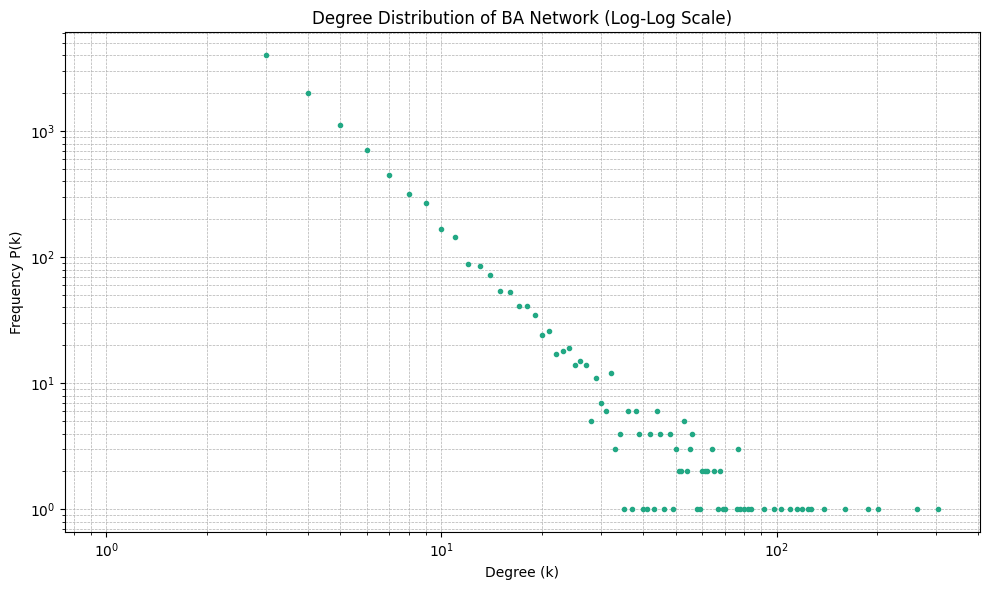

In [7]:

# --- STEP 4: Degree Distribution Plot ---
def plot_degree_distribution(graph):
    degrees = [d for n, d in graph.degree()]
    degree_counts = np.bincount(degrees)
    degrees_range = np.arange(len(degree_counts))

    plt.figure(figsize=(10, 6)) # Adjusted figure size
    # Plot on log-log scale for scale-free networks
    plt.loglog(degrees_range[1:], degree_counts[1:], marker='.', linestyle='none', color=sns.color_palette("viridis", as_cmap=True)(0.6)) 
    plt.xlabel("Degree (k)")
    plt.ylabel("Frequency P(k)")
    plt.title("Degree Distribution of BA Network (Log-Log Scale)")
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

plot_degree_distribution(G_giant)


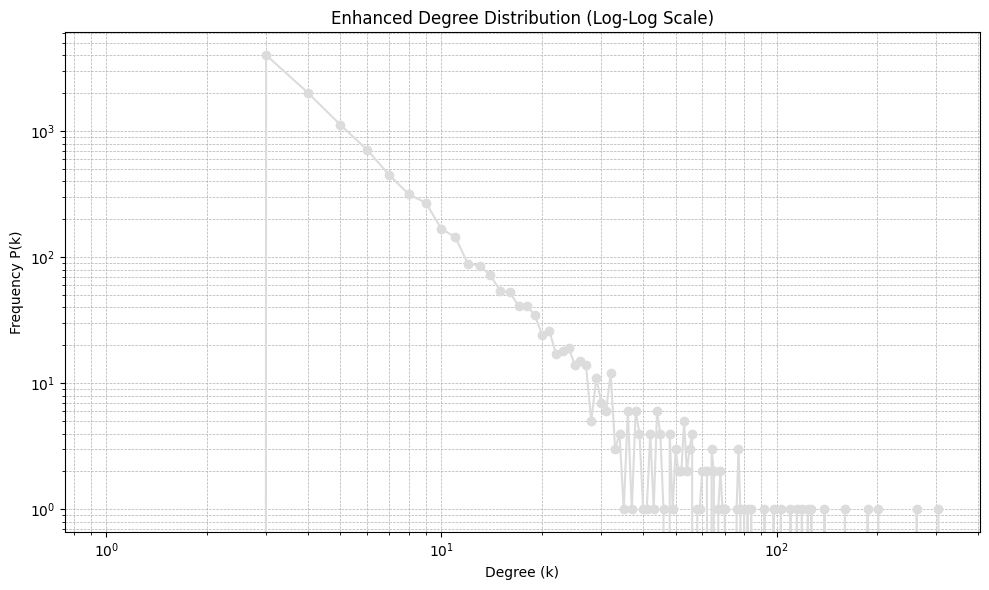

In [ ]:
# --- Additional Graph 1: Enhanced Degree Distribution ---
def plot_enhanced_degree_distribution(graph):
    degrees = [d for n, d in graph.degree()]
    degree_counts = np.bincount(degrees)
    degrees_range = np.arange(len(degree_counts))

    plt.figure(figsize=(10, 6))
    plt.loglog(degrees_range[1:], degree_counts[1:], marker='o', linestyle='-', color=sns.color_palette('coolwarm', as_cmap=True)(0.5))
    plt.xlabel('Degree (k)')
    plt.ylabel('Frequency P(k)')
    plt.title('Enhanced Degree Distribution (Log-Log Scale)')
    plt.grid(True, which='both', ls='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

plot_enhanced_degree_distribution(G_giant)